**Goal:** Perform exploratory data analysis on Flipkart sales to derive insights into pricing, ratings, and brand trends.

# 🧰 Required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 📥 1. Load the Dataset

In [7]:
# Load the dataset
df = pd.read_csv("/content/flipkart_com-ecommerce_sample.csv")

# View first few records
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# 📊 2. Dataset Overview

In [8]:
# Check shape and columns
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

# Summary
df.info()

Shape: (18783, 15)

Columns:
 Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18783 entries, 0 to 18782
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  18783 non-null  object 
 1   crawl_timestamp          18783 non-null  object 
 2   product_url              18783 non-null  object 
 3   product_name             18783 non-null  object 
 4   product_category_tree    18783 non-null  object 
 5   pid                      18783 non-null  object 
 6   retail_price             18708 non-null  float64
 7   discounted_price         18708 non-null  float64
 8   image         

# 🧹 3. Data Cleaning
We'll clean:
* Null values
* Irrelevant columns
* Format conversion (price, rating)

In [9]:
# Drop unused columns
df = df.drop(columns=['product_category_tree', 'pid', 'image', 'product_url'])

# Remove rows with all NaN
df.dropna(how='all', inplace=True)

# Clean 'retail_price' and 'discounted_price'
df['retail_price'] = pd.to_numeric(df['retail_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Clean ratings
df['product_rating'] = pd.to_numeric(df['product_rating'], errors='coerce')

# Check missing
df.isnull().sum()

,0
uniq_id,0
crawl_timestamp,0
product_name,0
retail_price,75
discounted_price,75
is_FK_Advantage_product,0
description,2
product_rating,17003
overall_rating,0
brand,5474


# 📈 4. Exploratory Data Analysis (EDA)
💸 a. Price vs Discount

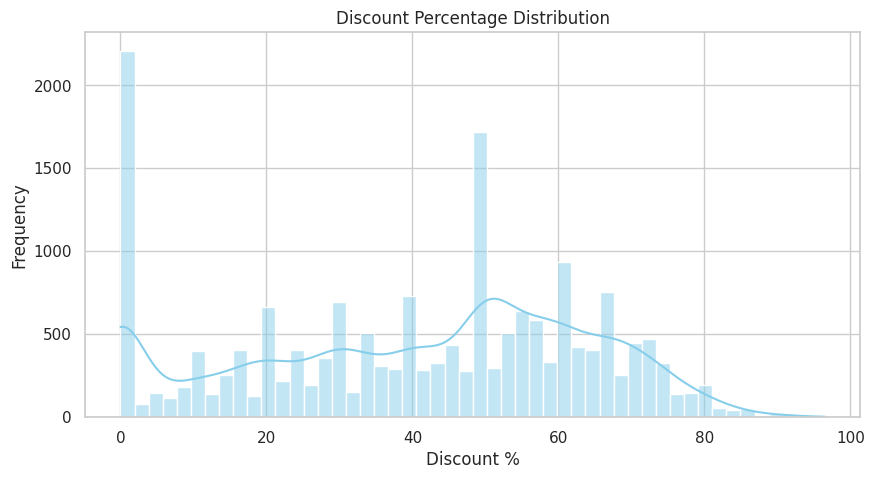

In [10]:
df['discount_%'] = ((df['retail_price'] - df['discounted_price']) / df['retail_price']) * 100

plt.figure(figsize=(10,5))
sns.histplot(df['discount_%'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount %')
plt.ylabel('Frequency')
plt.show()

📱 b. Top 10 Brands

/tmp/ipython-input-11-2180153369.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


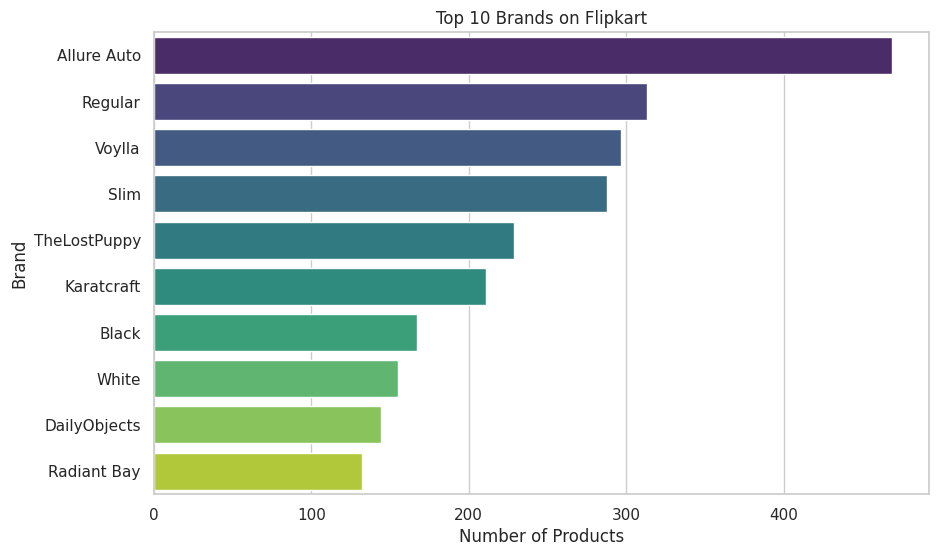

In [11]:
top_brands = df['brand'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title("Top 10 Brands on Flipkart")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

🌟 c. Rating Distribution

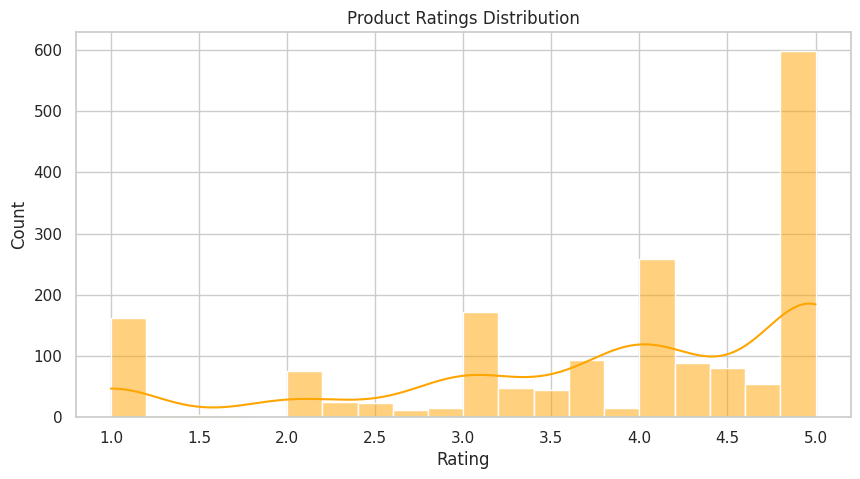

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['product_rating'].dropna(), bins=20, kde=True, color='orange')
plt.title("Product Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

💵 d. Retail vs Discounted Price

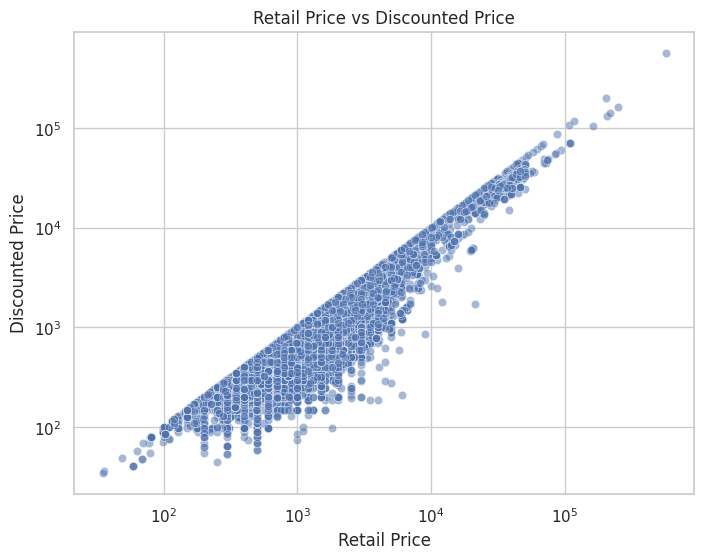

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='retail_price', y='discounted_price', alpha=0.5)
plt.title('Retail Price vs Discounted Price')
plt.xlabel('Retail Price')
plt.ylabel('Discounted Price')
plt.xscale('log')
plt.yscale('log')
plt.show()

# 🔍 5. Correlation Analysis

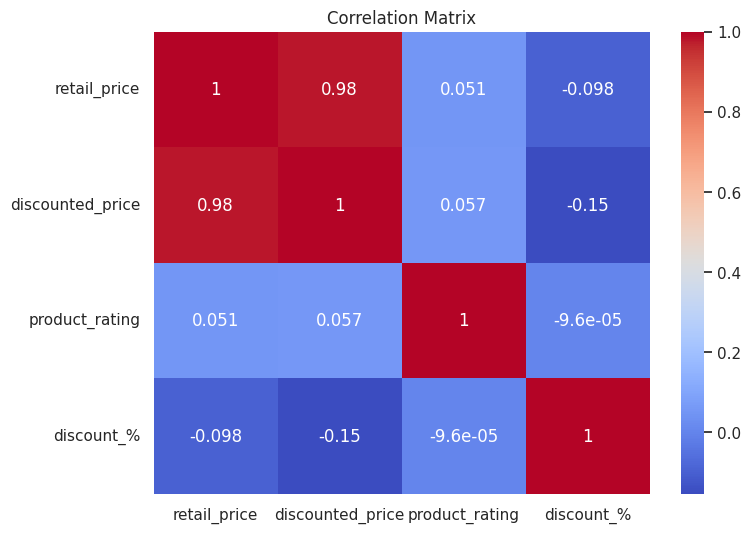

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['retail_price', 'discounted_price', 'product_rating', 'discount_%']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 📦 6. Text Analysis on Product Titles

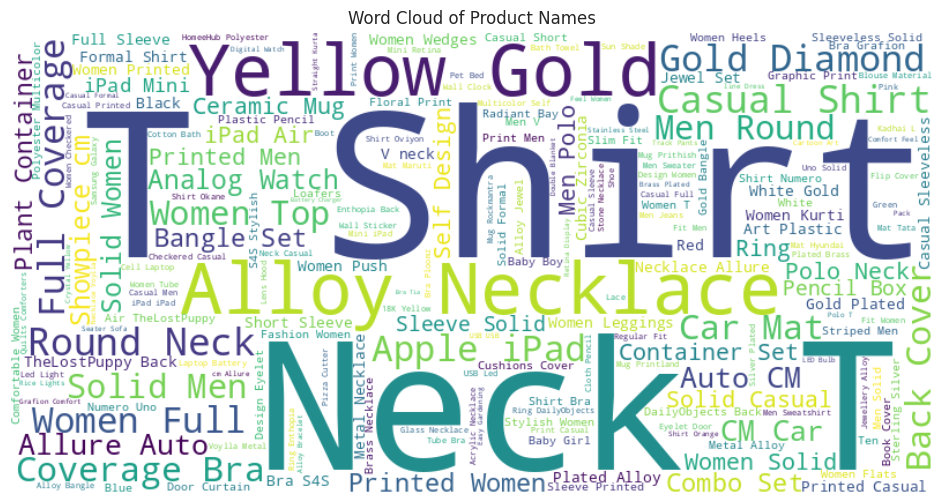

In [15]:
from wordcloud import WordCloud

text = " ".join(title for title in df['product_name'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Product Names")
plt.show()

# 📚 7. Key Business Insights

In [16]:
# Average discount
print(f"Average Discount: {df['discount_%'].mean():.2f}%")

# Top brands by average rating
top_rated_brands = df.groupby('brand')['product_rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 Brands by Average Rating:")
print(top_rated_brands)

# Products with highest discounts
top_discounts = df[['product_name', 'brand', 'retail_price', 'discounted_price', 'discount_%']].sort_values(by='discount_%', ascending=False).head(5)
print("Top 5 Highest Discounted Products:")
print(top_discounts)

Average Discount: 40.45%
Top 5 Brands by Average Rating:
brand
zDelhi.com             5.0
X-Doria                5.0
Woodino Handicrafts    5.0
United                 5.0
Womens Trendz          5.0
Name: product_rating, dtype: float64
Top 5 Highest Discounted Products:
                                            product_name      brand  \
17205  Rajcrafts Floral Double Quilts & Comforters White  Rajcrafts   
7284   FashBlush Forever New Orange Bead & Chain Allo...  FashBlush   
6566   FashBlush Forever Beautiful White Bead Alloy N...  FashBlush   
10941                     Bling Book Case for iPad 2 / 3      Bling   
6368   FashBlush Forever New BlackBead & LongChain Al...  FashBlush   

       retail_price  discounted_price  discount_%  
17205        6000.0             208.0   96.533333  
7284         3999.0             189.0   95.273818  
6566         3499.0             189.0   94.598457  
10941        1816.0              99.0   94.548458  
6368         4999.0             279.0   94.